<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projetos/Credit Card Fraud Detection/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

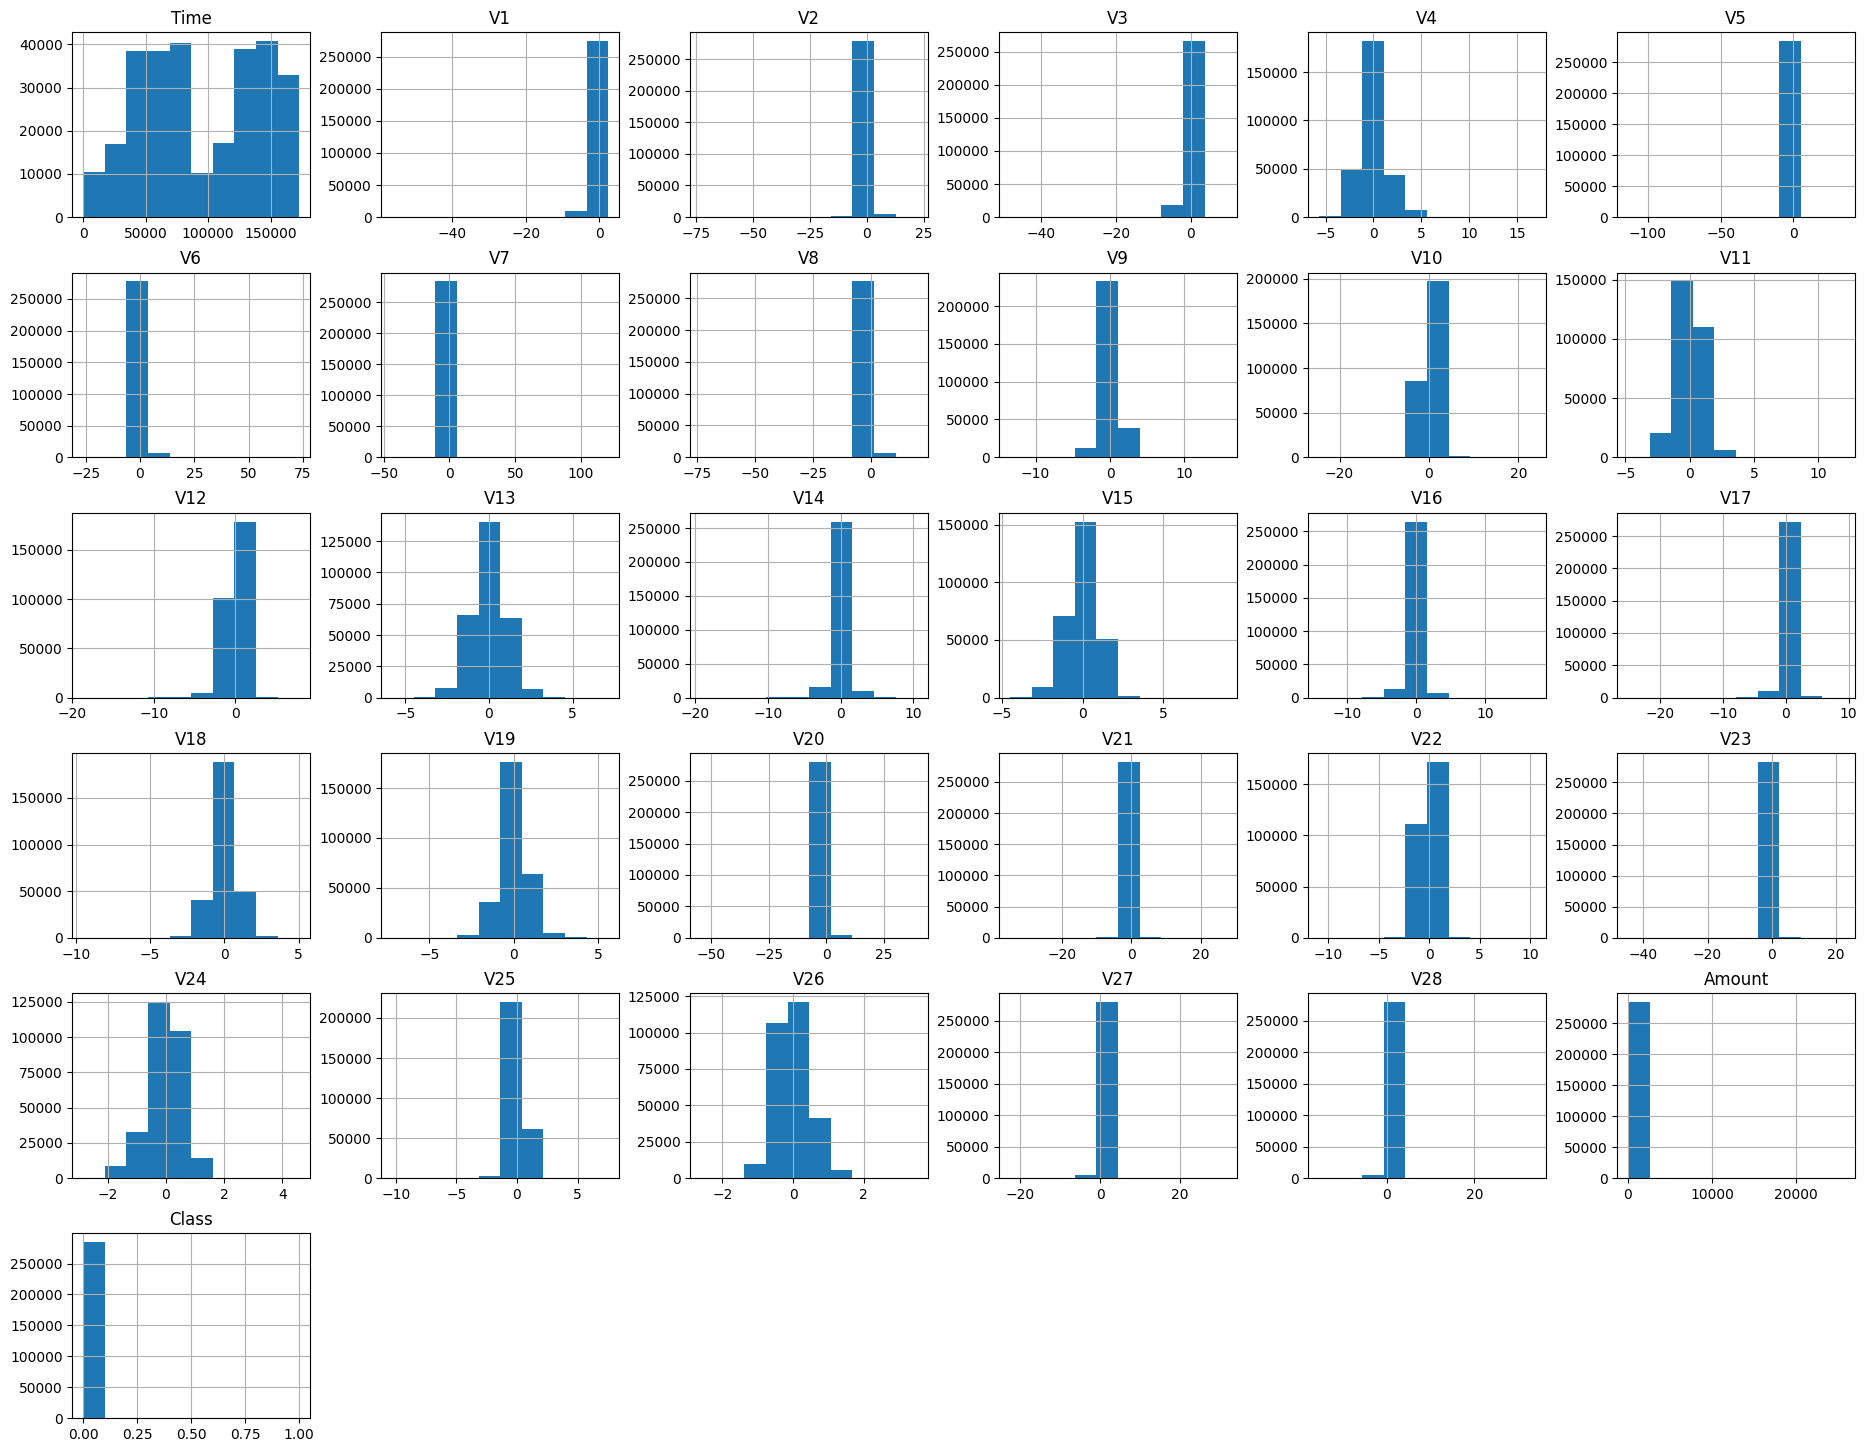

In [ ]:
data.hist(figsize=(23, 18))

In [ ]:
# 1 -> fraude
# 0 -> não fraude

data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

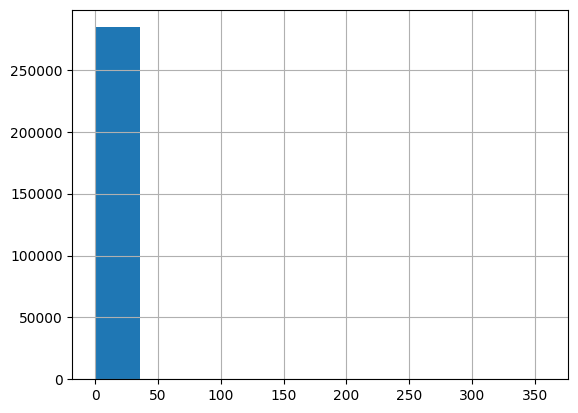

In [ ]:
from sklearn.preprocessing import RobustScaler

new_data = data.copy()
new_data["Amount"] = RobustScaler().fit_transform(new_data["Amount"].to_numpy().reshape(-1, 1))
new_data["Amount"].hist()

In [ ]:
new_data["Amount"].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [ ]:
time = new_data["Time"]
new_data["Time"] = (time - time.min()) / (time.max() - time.min())
new_data["Time"]

0         0.000000
1         0.000000
2         0.000006
3         0.000006
4         0.000012
            ...   
284802    0.999965
284803    0.999971
284804    0.999977
284805    0.999977
284806    1.000000
Name: Time, Length: 284807, dtype: float64

In [ ]:
new_data = new_data.sample(frac=1, random_state=42)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,0.240202,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,0.256152,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,0.205357,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.967192,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.975005,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.437624,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.279746,0
259178,0.920181,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.939426,0
131932,0.461798,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.252358,0
146867,0.508884,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.293440,0


In [ ]:
train, test, val = new_data[:240000], new_data[240000:262000], new_data[262000:]
print(train["Class"].value_counts())
print(test["Class"].value_counts())
print(val["Class"].value_counts())

0    239591
1       409
Name: Class, dtype: int64
0    21956
1       44
Name: Class, dtype: int64
0    22768
1       39
Name: Class, dtype: int64


In [ ]:
np_train, np_test, np_val = train.to_numpy(), test.to_numpy(), val.to_numpy()
print(np_train.shape)
print(np_test.shape)
print(np_val.shape)

(240000, 31)
(22000, 31)
(22807, 31)


In [ ]:
X_train, y_train = np_train[:, :-1], np_train[:, -1]
X_test, y_test = np_test[:, :-1], np_test[:, -1]
X_val, y_val = np_val[:, :-1], np_val[:, -1]

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9991363636363636

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, log_reg.predict(X_val),
                            target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.87      0.67      0.75        39

    accuracy                           1.00     22807
   macro avg       0.93      0.83      0.88     22807
weighted avg       1.00      1.00      1.00     22807



Usando redes neurais

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
shallow_nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_3 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [ ]:
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0522 - accuracy: 0.9865 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 2/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 3/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 4/5
7500/7500 [==============================] - 10s 1ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9996


In [ ]:
def neural_net_predictions(model, X_train):
  return (model.predict(X_train).flatten() > 0.5).astype(int)

In [ ]:
neural_net_predictions(shallow_nn, X_val)

713/713 [==============================] - 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, X_val), target_names=['Not Fraud', 'Fraud']))

713/713 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.89      0.85      0.87        39

    accuracy                           1.00     22807
   macro avg       0.95      0.92      0.93     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
print(classification_report(y_val, neural_net_predictions(rnd_clf, X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.92      0.59      0.72        39

    accuracy                           1.00     22807
   macro avg       0.96      0.79      0.86     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdt_boost_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gdt_boost_clf.fit(X_train, y_train)
print(classification_report(y_val, neural_net_predictions(gdt_boost_clf, X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.75      0.69      0.72        39

    accuracy                           1.00     22807
   macro avg       0.87      0.85      0.86     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(class_weight='balanced')
svc.fit(X_train, y_train)
print(classification_report(y_val, neural_net_predictions(svc, X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.87      0.85      0.86        39

    accuracy                           1.00     22807
   macro avg       0.93      0.92      0.93     22807
weighted avg       1.00      1.00      1.00     22807



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,0.240202,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,0.256152,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,0.205357,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.967192,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.975005,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0


In [ ]:
frauds = new_data.query('Class == 1')
not_frauds = new_data.query('Class == 0')

print("Not frauds ::: ", not_frauds['Class'].value_counts())
print("Frauds ::: ",frauds['Class'].value_counts())

Not frauds :::  0    284315
Name: Class, dtype: int64
Frauds :::  1    492
Name: Class, dtype: int64


In [ ]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
248233,0.890365,-0.385556,1.350800,1.943284,4.348705,0.904348,1.980317,0.664322,-0.015433,-1.482944,...,0.009935,0.514795,-0.562538,0.163291,0.642322,0.673732,-0.171536,-0.141777,0.240341,0
128479,0.455606,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,0.530986,1
86155,0.353651,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,...,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1.110878,1
98103,0.384972,-3.014645,0.987896,0.304238,0.354010,-0.843555,-0.737184,0.171922,0.565525,0.259202,...,-0.187817,-0.301740,-0.106044,0.450571,0.015101,0.124491,-0.872735,-0.500794,-0.155942,0
44346,0.242534,-4.035057,-3.393574,0.733396,-0.643994,2.865949,-3.489395,-1.278488,0.364726,0.357596,...,0.471235,-0.047274,-0.520309,0.504304,0.977133,-0.671151,0.016441,-0.671971,-0.293440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180719,0.721498,-3.522724,-1.157664,-0.794284,-2.805794,1.940904,4.463132,-0.530524,-2.387878,0.369244,...,2.133195,0.407078,0.595225,0.753027,0.224439,-0.146448,-1.149233,0.538817,1.495144,0
15781,0.157525,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.089779,1
112728,0.421194,-0.824663,-0.133017,2.781831,-1.176036,-1.358261,-0.213095,-0.134471,0.148357,-0.950320,...,-0.048094,0.115225,-0.059280,0.370968,0.108868,0.492906,0.024191,0.082105,0.903933,0
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1


In [ ]:
balanced_df_np = balanced_df.to_numpy()

X_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1]
X_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1]
X_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1]

In [ ]:
pd.Series(y_train_b).value_counts()

1.0    353
0.0    347
dtype: int64

In [ ]:
log_reg_b = LogisticRegression()
log_reg_b.fit(X_train_b, y_train_b)
log_reg_b.score(X_test_b, y_test_b)

0.9436619718309859

In [ ]:
print(classification_report(y_val_b, log_reg_b.predict(X_val_b),target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.94      0.94        72
       Fraud       0.94      0.94      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((X_train_b.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_b.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 59ms/step - loss: 0.6029 - accuracy: 0.7771 - val_loss: 0.5453 - val_accuracy: 0.7465
Epoch 2/40
22/22 [==============================] - 1s 44ms/step - loss: 0.5782 - accuracy: 0.7814 - val_loss: 0.5217 - val_accuracy: 0.8028
Epoch 3/40
22/22 [==============================] - 0s 24ms/step - loss: 0.5561 - accuracy: 0.8157 - val_loss: 0.5010 - val_accuracy: 0.8662
Epoch 4/40
22/22 [==============================] - 1s 27ms/step - loss: 0.5355 - accuracy: 0.8214 - val_loss: 0.4853 - val_accuracy: 0.9014
Epoch 5/40
22/22 [==============================] - 1s 48ms/step - loss: 0.5256 - accuracy: 0.8329 - val_loss: 0.4718 - val_accuracy: 0.9014
Epoch 6/40
22/22 [==============================] - 1s 28ms/step - loss: 0.5041 - accuracy: 0.8429 - val_loss: 0.4574 - val_accuracy: 0.9085
Epoch 7/40
22/22 [==============================] - 1s 27ms/step - loss: 0.4875 - accuracy: 0.8600 - val_loss: 0.4421 - val_accuracy: 0.9085
Epoch 8/40
22

In [ ]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, X_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.91      0.97      0.94        72
       Fraud       0.97      0.90      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, X_test_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        73
       Fraud       1.00      0.87      0.93        69

    accuracy                           0.94       142
   macro avg       0.95      0.93      0.94       142
weighted avg       0.94      0.94      0.94       142

